In [2]:
pip install opencv-python


  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install opencv-python-headless

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.5 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/38.5 MB 1.7 MB/s eta 0:00:23
   ---------------------------------------- 0.2/38.5 MB 2.1 MB/s eta 0:00:18
    --------------------------------------- 0.5/38.5 MB 3.3 MB/s eta 0:00:12
    --------------------------------------- 0.7/38.5 MB 3.6 MB/s eta 0:00:11
   - -------------------------------------- 1.0/38.5 MB 4.0 MB/s eta 0:00:10
   - -------------------------------------- 1.2/38.5 MB 4.4 MB/s eta 0:00:09
   - -------------------------------------- 1.5/38.5 MB 4.5 MB/s eta 0:00:09
   - -------------------------------------- 1.6/38.5 MB 4.4 MB/s eta 0:00:09
   - -------------------------------------- 1.8/38.5 MB 4.4 MB/s eta 0:00:09
   -- ------------------------------------- 2.0/38.5 MB 4.2 MB/s eta 0:00:09
   -- ------------------------------------- 2.2/38.5 MB 4.2 MB/s eta 0:00:09
   -- 

In [2]:
pip install opencv-contrib-python


   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 MB 640.0 kB/s eta 0:01:11
   ---------------------------------------- 0.1/45.3 MB 1.7 MB/s eta 0:00:27
   ---------------------------------------- 0.3/45.3 MB 2.5 MB/s eta 0:00:18
    --------------------------------------- 0.7/45.3 MB 3.8 MB/s eta 0:00:12
    --------------------------------------- 1.0/45.3 MB 4.5 MB/s eta 0:00:10
   - -------------------------------------- 1.2/45.3 MB 4.6 MB/s eta 0:00:10
   - -------------------------------------- 1.4/45.3 MB 4.3 MB/s eta 0:00:11
   - -------------------------------------- 1.5/45.3 MB 4.3 MB/s eta 0:00:11
   - -------------------------------------- 1.7/45.3 MB 4.4 MB/s eta 0:00:10
   - -------------------------------------- 1.9/45.3 MB 4.3 MB/s eta 0:00:11
   - -------------------------------------- 2.0/45.3 MB 4.1 MB/s eta 0:00:11
   - -------------------------------------- 2.3/45.3 MB 4.2 MB/s eta 0:00:11
   -

In [2]:
!pip install tensorflow


     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     --------------------------------- ---- 41.0/46.2 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 765.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB 4.3 MB/s eta 0:01:28
   ---------------------------------------- 0.5/377.0 MB 5.6 MB/s eta 0:01:07
   ---------------------------------------- 0.6/377.0 MB 5.0 MB/s eta 0:01:16
   ---------------------------------------- 1.0/377.0 MB 5.9 MB/s eta 0:01:04
   ---------------------------------------- 1.2/377.0 MB 5.5 MB/s eta 0:01:08
   ---------------------------------------- 1.4/377.0 MB 5.3 MB/s eta 0:01:12
   ---------------------------------------- 1.6/377.0 MB 5.0 MB/s eta 0:01:15
   ---------------------------------------- 1.8/377.0 MB 4.8 MB/s eta 0:01:18
   ---------------------------------------- 2.0/377.0 MB 4.8 MB/s eta 0:0

In [1]:
import os
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [5]:
img = cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-10.png')

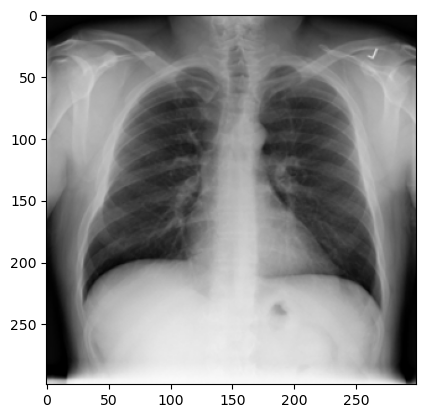

In [7]:
plt.imshow(img)

In [9]:
img.shape

(299, 299, 3)

In [11]:
df = pd.read_excel('COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

In [13]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [15]:
urls = os.listdir('COVID-19_Radiography_Dataset/Normal/images')

In [17]:
path = 'COVID-19_Radiography_Dataset/Normal/images' + urls[0]

In [19]:
path

'COVID-19_Radiography_Dataset/Normal/imagesNormal-1.png'

In [21]:
def loadImages(path,urls,target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + '/' + urls[i]
    img = cv2.imread(img_path)
    img = img/255.0
    img = cv2.resize(img,(100,100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images,labels

In [23]:
covid_path = 'COVID-19_Radiography_Dataset/COVID/images'
covid_urls = os.listdir('COVID-19_Radiography_Dataset/COVID/images')
covidImages,covidTarget = loadImages(covid_path,covid_urls,1)

In [25]:
normal_path = 'COVID-19_Radiography_Dataset/Normal/images'
normal_urls = os.listdir('COVID-19_Radiography_Dataset/Normal/images')
normalImages,normalTarget = loadImages(normal_path,normal_urls,0)

In [27]:
covidImages.shape

(3616, 100, 100, 3)

In [29]:
normalImages.shape

(10192, 100, 100, 3)

In [31]:
data = np.r_[covidImages,normalImages]

In [33]:
data.shape

(13808, 100, 100, 3)

In [35]:
targets = np.r_[covidTarget,normalTarget]

In [37]:
targets.shape

(13808,)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(data,targets,test_size=0.25)

In [55]:
from tensorflow.keras.layers import Input

In [67]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [69]:
model = Sequential()

model.add(Input(shape=(100, 100, 3)))

# Add the remaining layers
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [59]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 100, 100, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 50, 50, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 50, 50, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,006,370 (19.10 MB)

 Trainable params: 5,006,370 (19.10 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [73]:
model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.8042 - loss: 0.4313 - val_accuracy: 0.8778 - val_loss: 0.2979
Epoch 2/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9121 - loss: 0.2184 - val_accuracy: 0.9180 - val_loss: 0.2028
Epoch 3/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9438 - loss: 0.1453 - val_accuracy: 0.9452 - val_loss: 0.1472
Epoch 4/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9608 - loss: 0.1000 - val_accuracy: 0.9479 - val_loss: 0.1453
Epoch 5/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9708 - loss: 0.0793 - val_accuracy: 0.9592 - val_loss: 0.1274


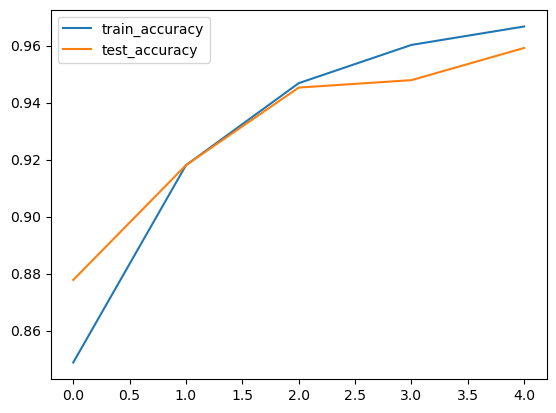

In [75]:
plt.plot(model.history.history['accuracy'],label='train_accuracy')
plt.plot(model.history.history['val_accuracy'],label='test_accuracy')
plt.legend()
plt.show()

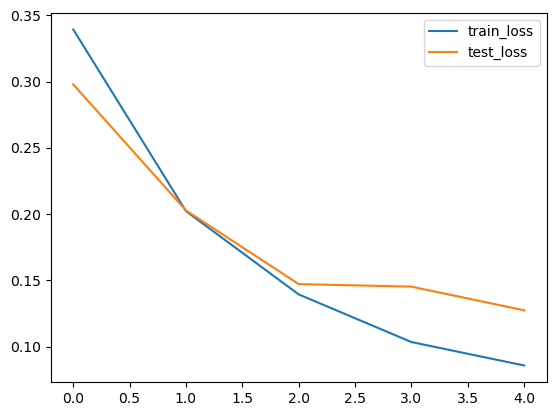

In [77]:
plt.plot(model.history.history['loss'],label='train_loss')
plt.plot(model.history.history['val_loss'],label='test_loss')
plt.legend()
plt.show()